<a href="https://colab.research.google.com/github/jbloewencolon/Analyzing-The-Doctrine-of-Discovery/blob/main/Analyzing_the_DoD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to conduct a language analysis of the intcats comprising the "Doctrine of Christian Discovery." Despite the dataset's limited size, this analysis will delve into sentiment analysis, topic modeling, and comparative text analysis to gain insights into historical perspectives on indigenous peoples, gold, and religious matters.


Step 1: Setting Up the Python Environment
First, we need to set up our Python environment with the necessary libraries.

In [25]:
!pip install vaderSentiment
!pip install --upgrade PyPDF2

# Importing required libraries
import pandas as pd
import PyPDF2
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim import corpora, models
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

file_path = '/content/drive/MyDrive/Colab Notebooks/DoD/Files/Inter Caetera.pdf'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 2: Data Collection and Preprocessing
After sourcing the intcats, we'll convert them into a text-readable format and clean the data.

In [15]:
# Function to preprocess and extract text from PDF
def preprocess_pdf(file_path):
    # Reading the PDF file
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''.join(page.extract_text() for page in reader.pages)

    # Lowercasing and tokenizing
    tokens = word_tokenize(text.lower())

    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

    return filtered_tokens

# Process the PDF file
intcat = preprocess_pdf(file_path)

Step 3: Exploratory Data Analysis (EDA)
We'll start with some basic EDA to understand our dataset better.

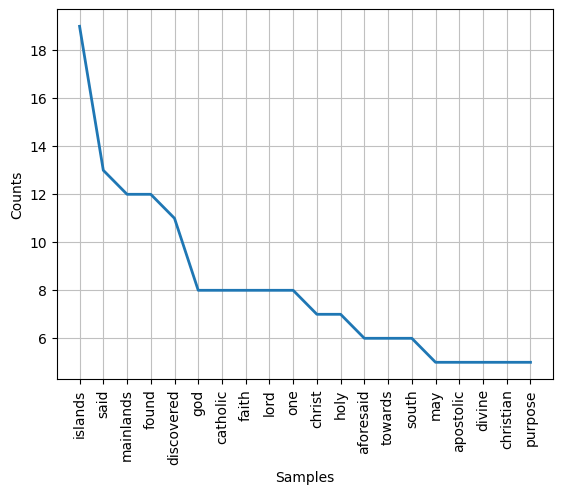

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
# Word Frequency Distribution
freq_dist = nltk.FreqDist(intcat)
freq_dist.plot(20, cumulative=False)

Step 4: Sentiment Analysis
Next, we'll analyze the sentiment of the text.

In [17]:
# Using TextBlob for sentiment analysis
blob = TextBlob(" ".join(intcat))
print(blob.sentiment)

# Using Vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores(" ".join(intcat)))

Sentiment(polarity=0.15193631669535285, subjectivity=0.4311675272518648)
{'neg': 0.025, 'neu': 0.676, 'pos': 0.299, 'compound': 0.9998}


In [26]:
text = " ".join(intcat)
sentences = sent_tokenize(text)
analyzer = SentimentIntensityAnalyzer()

sentiments = []

for sentence in sentences:
    sentiment_score = analyzer.polarity_scores(sentence)
    sentiments.append((sentence, sentiment_score['compound']))

# Sort the sentences by sentiment score
sentiments.sort(key=lambda x: x[1])

# Most negative sentences
most_negative = sentiments[:5]  # Adjust number as needed

# Most positive sentences
most_positive = sentiments[-5:]  # Adjust number as needed

print("Most Negative Sentences:")
for sentence, score in most_negative:
    print(f"{sentence} -> Score: {score}")

print("\nMost Positive Sentences:")
for sentence, score in most_positive:
    print(f"{sentence} -> Score: {score}")


Most Negative Sentences:
gilder lehrman collection glc04093 www.gilderlehrman.org pope alexander vi demarcation bull granting spain possession lands discovered columbus rome may 4 1493. broadside 1 sheet alexander bishop servant servants god illustrious sovereigns dear son christ ferdinand king dear daughter christ isabella queen castile leon aragon sicily granada health apostolic benediction among works well pleasing divine majesty cherished heart assuredly ranks highest times especially catholic faith christian religion exalted everywhere increased spread health souls cared barbarous nations overthrown brought faith wherefore inas much favor divine clemency though insufficient merits called holy see peter recognizing true catholic kings princes known always illustrious deeds already known almost whole world declare eagerly desire every effort zeal diligence without regard hardships expenses dangers shedding even blood laboring end recognizing also long si nce dedicated purpose whole 

Step 5: Topic Modeling
We'll use LDA to identify prominent topics in the text.

In [18]:
# Preparing data for LDA
dictionary = corpora.Dictionary([intcat])
corpus = [dictionary.doc2bow(text) for text in [intcat]]

# Applying LDA
lda_model = models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
print(lda_model.print_topics())


[(0, '0.002*"islands" + 0.002*"found" + 0.002*"faith" + 0.002*"mainlands" + 0.002*"catholic" + 0.002*"said" + 0.002*"discovered" + 0.002*"south" + 0.002*"holy" + 0.002*"one"'), (1, '0.002*"islands" + 0.002*"said" + 0.002*"found" + 0.002*"mainlands" + 0.002*"discovered" + 0.002*"faith" + 0.002*"one" + 0.002*"lord" + 0.002*"aforesaid" + 0.002*"god"'), (2, '0.018*"islands" + 0.012*"said" + 0.011*"mainlands" + 0.011*"found" + 0.010*"discovered" + 0.008*"god" + 0.008*"lord" + 0.008*"catholic" + 0.008*"one" + 0.008*"faith"')]


Step 6: Comparative Text Analysis
We'll compare the frequency and context of key words.

In [20]:
# Comparative analysis
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([" ".join(intcat)])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(word_freq)

   1493  accomplish  accomplished  accord  accordance  acquired  actual  \
0     1           1             1       3           1         1       2   

   aforesaid  aid  alexander  ...  works  world  worship  worthy  would  \
0          6    1          2  ...      1      1        1       2      3   

   wrath  www  year  yoke  zeal  
0      1    5     3     1     2  

[1 rows x 518 columns]


Step 7: Visualizations and Reporting
We'll create visualizations to effectively communicate our findings.

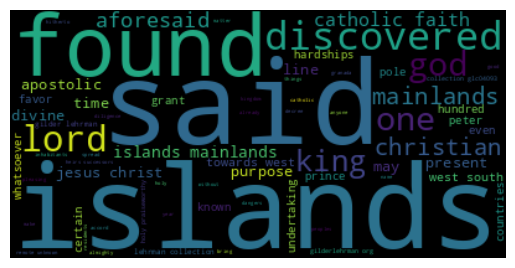

In [21]:
# Example: Creating a Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(" ".join(intcat))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Step 9: Further Research and Analysis
Suggestions for further research and analysis go here.

Step 10: Ethical Considerations
Reflect on the ethical aspects of analyzing such historical texts.

Step 11: Limitations and Future Work
Acknowledge the limitations due to the small size of the dataset and propose future research directions.